## In this notebook, amplicon data will be imported as raw read counts and each ASV occurrence will be modeled as a probability distribution. Samples will then be clustered based on their overall community composition.

### Import all the dependencies

In [1]:
import os
import pandas as pd
import numpy as np
import subprocess

### Move to working directory

In [2]:
os.chdir('/Users/nastassia.patin/GitHub/MarineDNA')

### 01. This section imports the amplicon data as raw counts and calls an R script to model the ASV occurrence as a probability distribution. 

#### Import example amplicon data sheet and take a look

In [3]:
file = 'Data/Flyer2018_16S_table_counts.tsv'
asvs = pd.read_csv(file, index_col=0, sep='\t')
asvs

,CN18Fc12_8_eDNA,CN18Fc19_5_eDNA,CN18Fc21_6_eDNA,CN18Fc22_6_eDNA,CN18Fc24_6_eDNA,CN18Fc25_5_eDNA,CN18Fc27_4_eDNA,CN18Fc29_6_eDNA,CN18Fc30_4_eDNA,CN18Fc32_4_eDNA,...,CN18SESPkoa_SC36,CN18SESPkoa_SC37,CN18SESPkoa_SC39,CN18SESPkoa_SC40,CN18SESPkoa_SC41,CN18SESPkoa_SC42,CN18SESPkoa_SC44,CN18SESPkoa_SC45,CN18SESPkoa_SC47,CN18SESPkoa_SC49
ASV ID,,,,,,,,,,,,,,,,,,,,,
495c1bd1608a1dad54d3e2824ce899ef,552,7415,8749,8152,7124,12422,215,8080,8799,2231,...,4324,1339,95,1554,147,2720,21,2015,1847,1886
a900b6678ce86851fb16bfafb87f3326,210,1933,2808,1967,1671,4912,57,3688,3343,1134,...,21023,8898,1367,8291,1112,9881,60,8726,9330,8852
c8e360969108fa2125a3d56eb4dad24f,145,2089,2530,2086,2343,2395,129,1625,1664,639,...,4830,9,566,20,551,60,43,22,28,44
72143fd9e63fe40c1258948d2f0d79c3,130,1830,2516,2178,2256,3332,56,2535,2316,629,...,4227,83,512,75,497,154,48,97,116,80
7b6b178fad5599c0e9a734e4fb09fd64,156,1742,1761,1855,1812,2467,73,1663,1612,515,...,2385,47,287,45,520,104,50,57,72,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674933a0d44342a0647f7a5b4591f26e,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bebe1b9a7e9aaa78172c1208111f4570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0128431733f67d02efad766d717fe6fd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Call the R script to model the ASV count distributions

#### Function to run R program on input data given the file name
#### For the purposes of dimensionality reduction and clustering, we don't need the sample names and ASV labels. The R script that models the count probabilities thus exports the data without those labels.

In [4]:
def call_Rscript_for_amplicon_modeling(path, sample_num, arg1):
    # Use subprocess.Popen to open executable Rscript and extract stdout from 'print' command in R
    with subprocess.Popen(['Rscript', path, '--args', '--vanilla', arg1], 
                          stdout=subprocess.PIPE) as result:
        asvs_freq = result.stdout.read()
    
    # The R output gets imported as "bytes"; need to convert to string and remove whitespace
    y = asvs_freq.decode("utf-8")
    y = y.split()

    # Convert to numpy array
    array = np.asarray(y)
    # Reshape to original dimensions; number of samples (columns) is second field, 
    # unknown number of ASVs can be supplied with '-1'
    mat = np.reshape(array, (-1, sample_num))

    # Convert to data frame with float values instead of strings
    df = pd.DataFrame(mat)
    df = df.astype(float)
    return(df)

#### Define arguments

In [5]:
path_to_rscript = '/Users/nastassia.patin/GitHub/MarineDNA/ranRelPct_testdata.R'
data_file_name = 'Flyer2018_16S_table_counts.tsv'
number_of_samples = 62

#### Run function with data set of interest

In [6]:
asvs_modeled = call_Rscript_for_amplicon_modeling(path_to_rscript, 
                                                  number_of_samples, 
                                                  data_file_name)

In [7]:
asvs_modeled

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.082285,1.726361e-01,0.134960,1.530391e-01,0.131311,0.124759,0.046539,0.112443,0.132490,0.097747,...,0.015774,0.027809,0.002360,0.029945,0.003190,4.571828e-02,0.002355,0.037444,0.030458,0.034836
1,0.030906,4.523171e-02,0.042071,3.925562e-02,0.029118,0.049272,0.009555,0.051870,0.048831,0.048912,...,0.075493,0.182678,0.033216,0.155171,0.023759,1.669345e-01,0.007650,0.161338,0.152140,0.157269
2,0.020721,4.839994e-02,0.037882,3.977911e-02,0.044202,0.022964,0.032494,0.022346,0.024217,0.026242,...,0.017535,0.000255,0.012919,0.000307,0.011436,1.030087e-03,0.007382,0.000359,0.000586,0.000681
3,0.021602,4.132980e-02,0.038353,4.203542e-02,0.042428,0.033588,0.015586,0.035861,0.033419,0.025519,...,0.015489,0.001633,0.011972,0.001368,0.009929,2.768662e-03,0.006451,0.002193,0.002097,0.001656
4,0.024015,4.105661e-02,0.026767,3.514972e-02,0.032552,0.024461,0.016965,0.023104,0.023926,0.021772,...,0.008348,0.000973,0.006947,0.000920,0.011494,1.748941e-03,0.008323,0.001269,0.001270,0.000786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747,0.000079,2.027658e-05,0.000017,9.042778e-06,0.000016,0.000016,0.000083,0.000040,0.000012,0.000024,...,0.000004,0.000025,0.000002,0.000002,0.000007,6.878272e-06,0.000082,0.000009,0.000026,0.000009
2748,0.000112,1.669604e-05,0.000003,5.265475e-05,0.000048,0.000024,0.000460,0.000008,0.000032,0.000199,...,0.000012,0.000015,0.000003,0.000043,0.000022,1.136892e-05,0.000234,0.000066,0.000025,0.000005
2749,0.000081,1.887614e-05,0.000001,1.756608e-05,0.000010,0.000004,0.000162,0.000004,0.000029,0.000100,...,0.000004,0.000016,0.000006,0.000053,0.000010,2.521693e-05,0.000277,0.000021,0.000007,0.000018
2750,0.000143,5.176610e-06,0.000007,2.002040e-07,0.000019,0.000007,0.000094,0.000011,0.000010,0.000039,...,0.000007,0.000034,0.000064,0.000003,0.000018,1.458608e-05,0.000002,0.000002,0.000008,0.000012


## 02. Use the modeled counts table generated in [01] to reduce dimensionality and visualize principal components

In [101]:
from sklearn.decomposition import PCA
import seaborn as sns

#### Transpose data frame so columns are ASVs and rows are samples

In [144]:
asvs_modeled = asvs_modeled.T
asvs_modeled

,0,1,2,3,4,5,6,7,8,9,...,2742,2743,2744,2745,2746,2747,2748,2749,2750,2751
0,0.079373,0.029930,0.023312,0.019333,0.021715,0.007566,0.000035,0.014461,0.031010,0.014019,...,4.620640e-04,1.680285e-04,0.000165,6.128403e-05,0.000431,3.809377e-04,0.000001,0.000170,6.719431e-05,0.000071
1,0.171324,0.043293,0.046911,0.042013,0.040376,0.012328,0.006010,0.012702,0.016678,0.021128,...,4.188607e-06,5.646863e-07,0.000002,6.450833e-06,0.000008,2.633604e-05,0.000061,0.000021,5.623164e-05,0.000025
2,0.132554,0.042538,0.038529,0.038335,0.026849,0.011873,0.009708,0.018207,0.023826,0.019472,...,4.766826e-06,3.214791e-06,0.000002,5.492923e-06,0.000010,8.421671e-06,0.000034,0.000051,1.371462e-05,0.000010
3,0.153570,0.037821,0.040126,0.042192,0.035612,0.010251,0.006298,0.014412,0.018625,0.018126,...,9.438270e-07,6.242190e-06,0.000048,1.744738e-05,0.000008,3.670584e-07,0.000060,0.000027,8.734883e-07,0.000059
4,0.130027,0.031946,0.044679,0.042810,0.032749,0.014029,0.005695,0.016519,0.022137,0.015230,...,2.060270e-05,8.103099e-05,0.000041,1.740288e-05,0.000005,6.353775e-06,0.000004,0.000009,4.818820e-05,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.046318,0.165947,0.000993,0.002597,0.001733,0.011245,0.045835,0.002843,0.001924,0.004958,...,6.019032e-05,5.512698e-06,0.000002,3.374571e-05,0.000023,2.966651e-06,0.000037,0.000013,4.702003e-06,0.000009
58,0.004029,0.008593,0.007682,0.007022,0.007384,0.035108,0.000255,0.030028,0.003465,0.000024,...,3.362824e-06,1.475409e-04,0.000104,6.636017e-04,0.000059,1.547342e-04,0.000265,0.000032,1.063781e-04,0.000121
59,0.036846,0.166325,0.000482,0.002026,0.001237,0.006887,0.052283,0.002138,0.001389,0.003464,...,1.317207e-05,1.031667e-05,0.000023,5.772618e-06,0.000041,5.872471e-05,0.000004,0.000003,1.326481e-05,0.000003
60,0.030266,0.154231,0.000518,0.001860,0.001229,0.004903,0.042065,0.001284,0.001124,0.003686,...,3.526356e-05,3.653019e-06,0.000018,3.520023e-07,0.000056,2.876127e-06,0.000018,0.000028,1.675583e-05,0.000018


#### Convert data to log-odds (with natural log base e) for Euclidean distances

In [145]:
asvs_modeled_logodds = np.log(asvs_modeled)

### 02a. From untransformed matrix

In [146]:
pca = PCA(n_components=62)
pca.fit_transform(asvs_modeled)
variance_array = np.cumsum(pca.explained_variance_ratio_ * 100)
variance_array

array([ 61.95161239,  90.72111008,  93.34434057,  95.45786434,
        96.71277011,  97.32386737,  97.77632068,  98.11554662,
        98.37583197,  98.60916377,  98.8262868 ,  98.9954257 ,
        99.15460707,  99.26915952,  99.36268903,  99.43669265,
        99.49502292,  99.53807116,  99.57690931,  99.61294356,
        99.64563302,  99.67091739,  99.69425645,  99.71550969,
        99.73579668,  99.75485061,  99.77207868,  99.78718283,
        99.80140358,  99.81507883,  99.82725547,  99.83837977,
        99.84915471,  99.85926129,  99.86845407,  99.877004  ,
        99.8852546 ,  99.8931644 ,  99.90067601,  99.90780683,
        99.91481358,  99.92134341,  99.92731105,  99.93318367,
        99.93885311,  99.94418352,  99.94931365,  99.95418115,
        99.95889526,  99.96328914,  99.96767547,  99.97174333,
        99.97556856,  99.97928873,  99.98276923,  99.98611027,
        99.98930912,  99.99227294,  99.99494265,  99.99757753,
       100.        , 100.        ])

In [147]:
print("Variance explained by the first principal component: = ",
     variance_array[0])
print("Variance explained by the second principal component: = ",
     variance_array[1])
print("Variance explained by the third principal component: = ",
     variance_array[2])

Variance explained by the first principal component: =  61.95161238615323
Variance explained by the second principal component: =  90.72111008401662
Variance explained by the third principal component: =  93.34434057333434


### 02b. From log-transformed matrix

In [148]:
pca = PCA(n_components=62)
pca.fit_transform(asvs_modeled_logodds)
variance_array_logodds = np.cumsum(pca.explained_variance_ratio_ * 100)
variance_array_logodds

array([ 19.77421934,  28.73043021,  35.07748917,  37.38105452,
        39.20554876,  40.92431355,  42.49347195,  44.01310088,
        45.47369747,  46.83928615,  48.18798375,  49.52675117,
        50.83356665,  52.11975514,  53.39061633,  54.64750875,
        55.8970296 ,  57.13631844,  58.36150705,  59.57111674,
        60.77150866,  61.95772488,  63.12866645,  64.28745209,
        65.43605361,  66.57455835,  67.6995092 ,  68.81532829,
        69.92605125,  71.02345257,  72.10298696,  73.17426827,
        74.23008477,  75.27732464,  76.31582585,  77.34630502,
        78.36995038,  79.37394997,  80.37219331,  81.36036982,
        82.33563108,  83.30820581,  84.26721738,  85.21847107,
        86.16381472,  87.10192967,  88.03084515,  88.94852199,
        89.86145792,  90.76239637,  91.65067397,  92.52810682,
        93.39428087,  94.25238549,  95.10331151,  95.93989712,
        96.77347316,  97.60002249,  98.41314687,  99.21012916,
       100.        , 100.        ])

In [149]:
print("Variance explained by the first principal component: = ",
     variance_array_logodds[0])
print("Variance explained by the second principal component: = ",
     variance_array_logodds[1])
print("Variance explained by the third principal component: = ",
     variance_array_logodds[2])

Variance explained by the first principal component: =  19.774219340211673
Variance explained by the second principal component: =  28.730430206947837
Variance explained by the third principal component: =  35.07748917026186


### Plot components vs variance explained

#### Function to format variance numpy array for seaborn plot

In [88]:
def format_variance_data_for_plotting(variance_array):
    df = pd.DataFrame(variance_array, columns = ["Explained variance"])
    df = df.reset_index(level=0)
    df['index'] = df['index'] + 1
    df = df.rename(columns = {"index" : "Component number"})
    return(df)

#### Apply function to raw count probabilities

[Text(0.5, 1.0, 'Principal components of ASV count probabilities')]

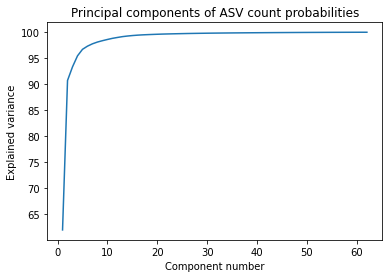

In [150]:
df_variance = format_variance_data_for_plotting(variance_array)
sns.lineplot(data=df_variance, x="Component number", 
             y="Explained variance").set(title='Principal components of ASV count probabilities') 

#### Apply function to log-odds transformed count probabilities

[Text(0.5, 1.0, 'Principal components of log-odds transformed ASV count probabilities')]

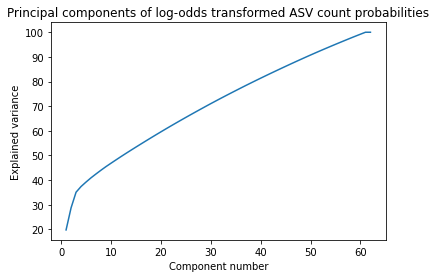

In [151]:
df_variance = format_variance_data_for_plotting(variance_array_logodds)
sns.lineplot(data=df_variance, x="Component number", 
             y="Explained variance").set(title='Principal components of log-odds transformed ASV count probabilities') 

#### We can see that log-transforming the data causes dimensionality reduction to explain much less of the variance than untransformed data. Why is this the case?

### Plot principal components of raw and log-transformed ASV count probabilities

<AxesSubplot:>

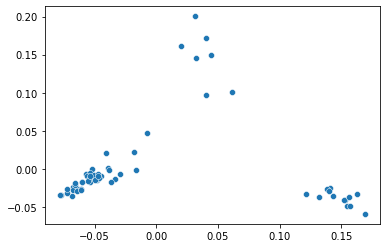

In [152]:
ca = PCA(n_components=3)
pcs = pca.fit_transform(asvs_modeled)

pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

<AxesSubplot:>

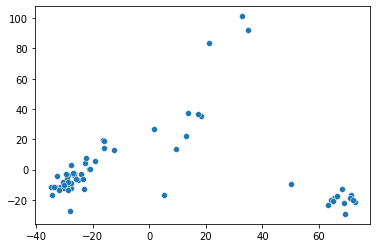

In [153]:
ca = PCA(n_components=3)
pcs_logodds = pca.fit_transform(asvs_modeled_logodds)

pc1_values = pcs_logodds[:,0]
pc2_values = pcs_logodds[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

## 03. Performing hierarchical clustering: default SciPy model

In [154]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

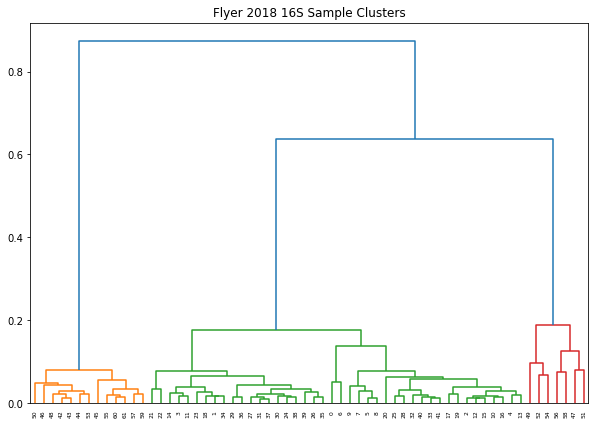

In [155]:
plt.figure(figsize=(10, 7))
plt.title("Flyer 2018 16S Sample Clusters")

# Make the clusters
clusters = shc.linkage(pcs, 
            method='ward', 
            metric='euclidean')
shc.dendrogram(Z=clusters)
plt.show()

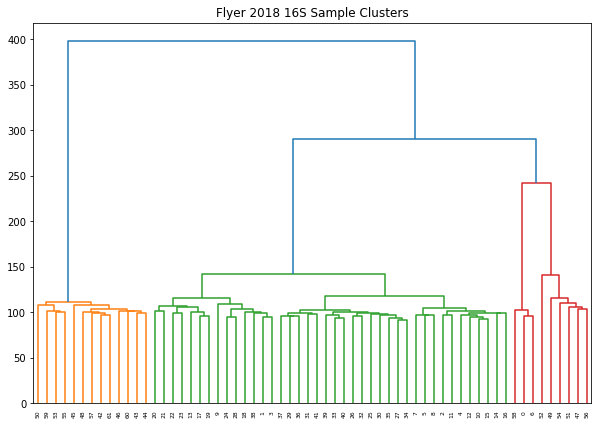

In [125]:
plt.figure(figsize=(10, 7))
plt.title("Flyer 2018 16S Sample Clusters")

# Make the clusters
clusters = shc.linkage(pcs_logodds, 
            method='ward', 
            metric='euclidean')
shc.dendrogram(Z=clusters)
plt.show()

## 04. Performing hierarchical clustering: create an agglomerative hierarchical clustering model with Scikit-Learn

In [156]:
pcs_select = pd.DataFrame(pcs)
pcs_select = pcs_select.iloc[:, 0:2]
pcs_select = pcs_select.set_axis(['PC_1', 'PC_2'], axis=1, inplace=False)
pcs_select

,PC_1,PC_2
0,-0.018210,0.022535
1,-0.077237,-0.034341
2,-0.048516,-0.014861
3,-0.067316,-0.023328
4,-0.057440,-0.006489
...,...,...
57,0.132082,-0.037227
58,0.032301,0.145485
59,0.142879,-0.035560
60,0.138394,-0.025993


In [157]:
from sklearn.cluster import AgglomerativeClustering

In [160]:
# Linkage options are "ward", "average", "complete", and "single"
clustering_model = AgglomerativeClustering(n_clusters=3, 
                                           affinity='euclidean', 
                                           linkage='complete')
clustering_model.fit(pcs_select)
clustering_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2])

Text(0.5, 1.0, 'Flyer 2018 16S Samples')

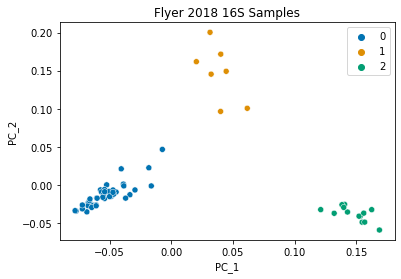

In [162]:
data_labels = clustering_model.labels_
sns.scatterplot(data=pcs_select, 
                x='PC_1',
                y='PC_2',
                hue=data_labels,
                palette="colorblind").set_title('Flyer 2018 16S Samples')

### EXTRA NOTE: Below is something I did for a k-means analysis once; it was a useful way of determining how many clusters are informative. Need to figure out how to do this with hierarchical clustering.

#### Determine how many clusters are most informative. Once the line starts to level out, more clusters become less useful.

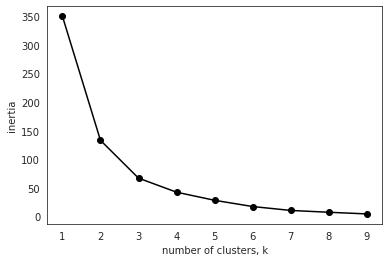

In [233]:
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()